In [72]:
#pip install praw

In [73]:
import praw
import scipy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [74]:
reddit = praw.Reddit(client_id='uz0GGtNus3EBu3Z-cEezLA',
                     client_secret='Dyti3NmQRpufHGpgP6qk7aKGyg-dAQ',
                     user_agent='YOUR_USER_AGENT',
                     username='Agreeable_Basil_3674',
                     password='FU,FH*-fe/84e&(')




In [98]:
submissions = reddit.subreddit('TaylorSwift').new(limit=50)

d = []
for submission in submissions:
    sub_auth = submission.author
    sub = reddit.submission(submission.id)
    sub.comments.replace_more(limit=None)

    for top_level_comment in sub.comments:
        top_l_auth = top_level_comment.author
        elem = [str(sub_auth), str(top_l_auth)]
        d.append(elem)

        for second_level_comment in top_level_comment.replies:
            sec_l_auth = second_level_comment.author
            elem = [str(top_l_auth), str(sec_l_auth)]
            d.append(elem)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [99]:
g_df= pd.DataFrame(d,columns=['Author1','Author2'])
g_df= g_df.drop_duplicates()
G = nx.Graph()
for index, r in g_df.iterrows():
      G.add_edge(r['Author1'],r['Author2'])

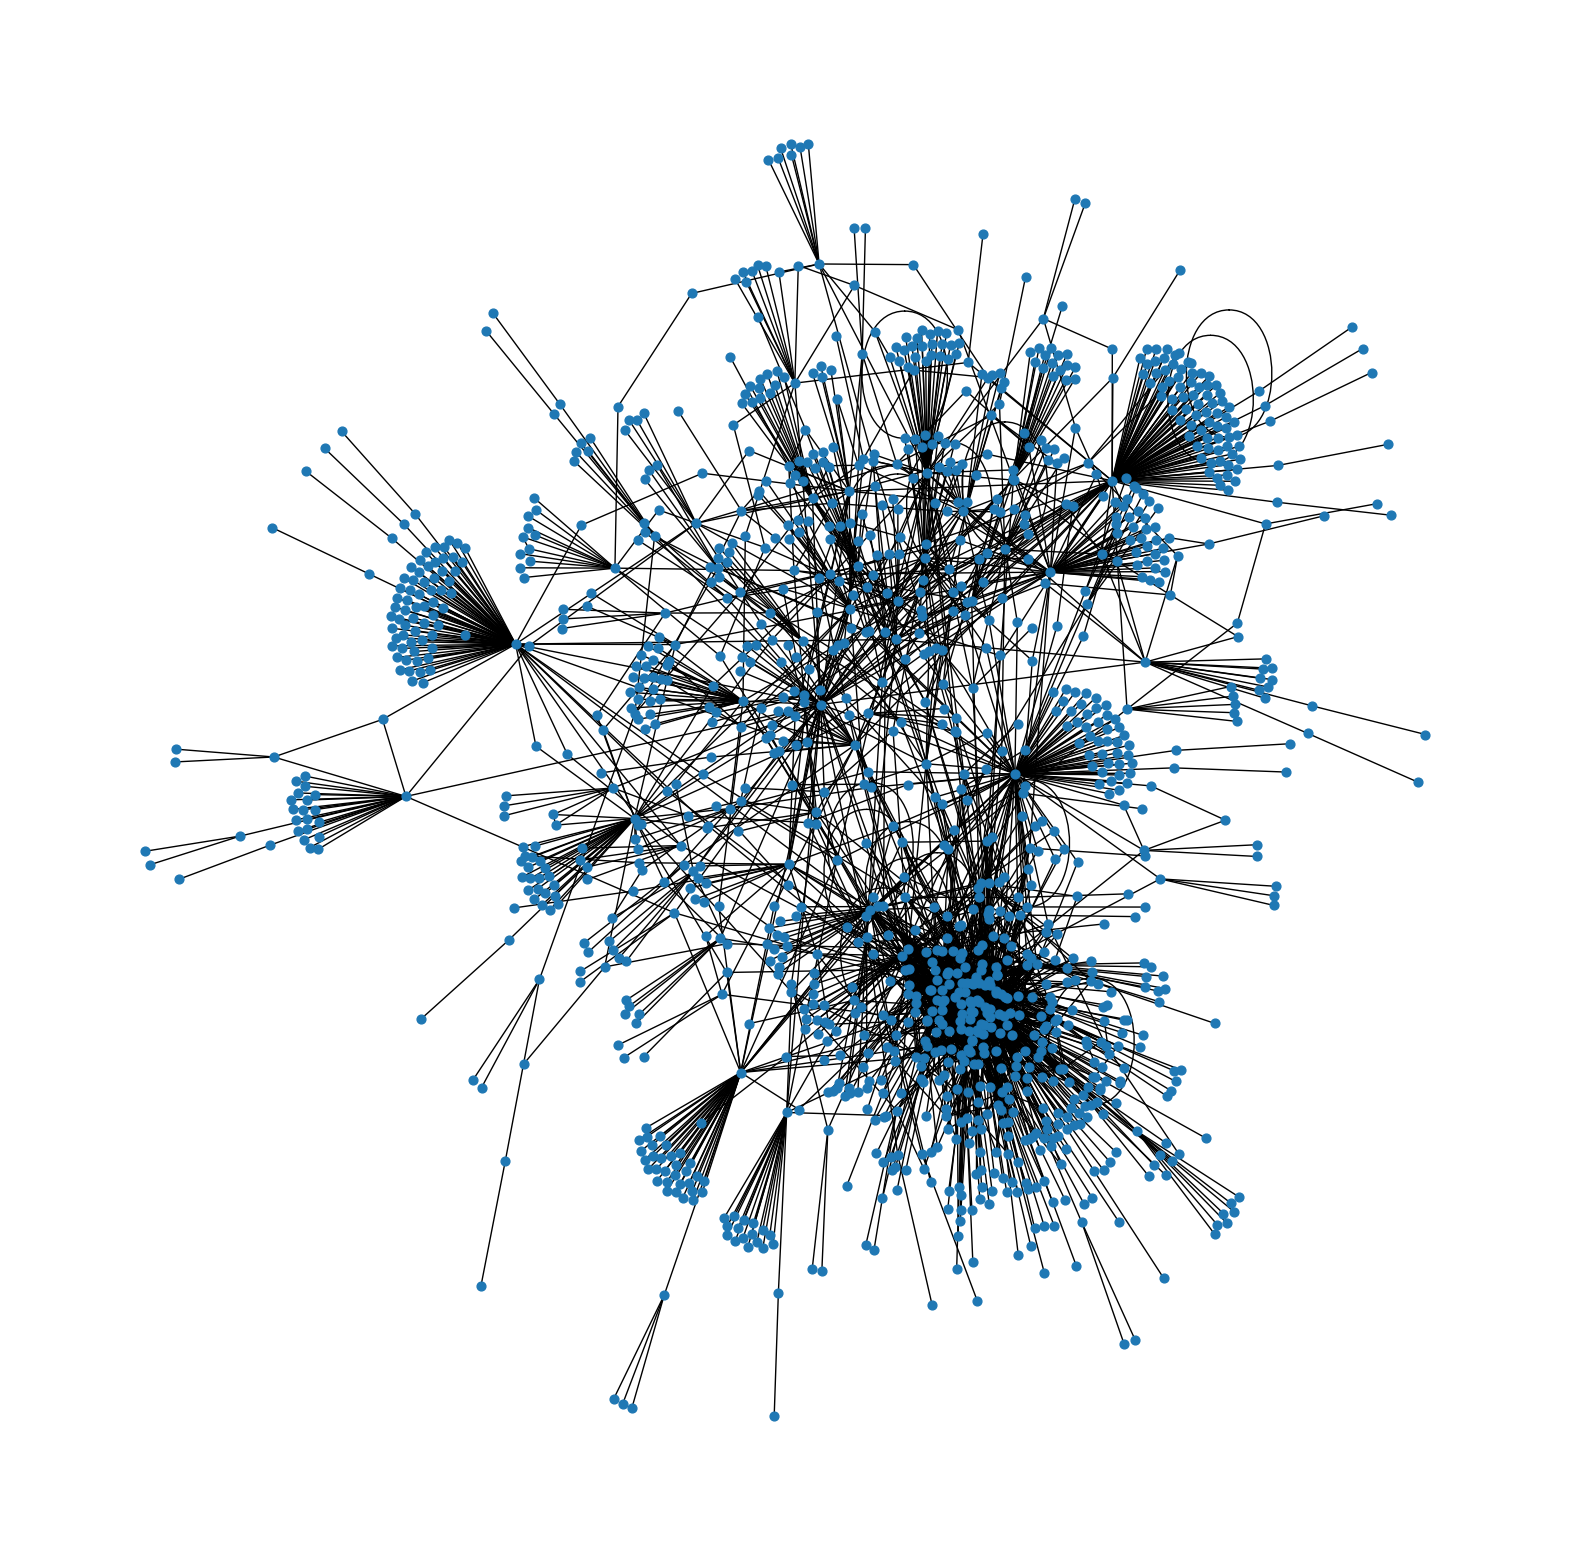

In [100]:
fig, ax = plt.subplots(figsize=(20, 20))
fig.set_facecolor('#eef0e9')

nx.draw_spring(G, node_size=40, with_labels=False, ax=ax)
plt.show()

In [78]:
#!pip install scipy


In [79]:
#!pip install --upgrade scipy


In [101]:
from networkx import degree_centrality
from networkx import closeness_centrality
from networkx import betweenness_centrality


In [102]:
centrality_values = nx.degree_centrality(G)

top_nodes = sorted(centrality_values, key=centrality_values.get, reverse=True)[:5]

print("Top 5 nodi con la massima centralità di grado:")
for node in top_nodes:
    print(f"Node {node}: {centrality_values[node]}")

Top 5 nodi con la massima centralità di grado:
Node PassionateAsSin: 0.1760821716801174
Node MadameFutureWhatEver: 0.0748349229640499
Node nfl: 0.07410124724871607
Node Mazerr44: 0.06089508437270727
Node this_diamond_ring: 0.04402054292002935


In [103]:
closeness_values = nx.closeness_centrality(G)

top_nodes_closeness = sorted(closeness_values, key=closeness_values.get, reverse=True)[:5]

print("Top 5 nodi con la massima closeness centrality:")
for node in top_nodes_closeness:
    print(f"Node {node}: {closeness_values[node]}")

Top 5 nodi con la massima closeness centrality:
Node AutoModerator: 0.4141598298389547
Node PassionateAsSin: 0.36259643522213353
Node bubblecuffer13: 0.36125099390405513
Node icoulddance: 0.3573675930781332
Node nfl: 0.35047570069426587


In [104]:
betweenness_values = nx.betweenness_centrality(G)

top_nodes_betweenness = sorted(betweenness_values, key=betweenness_values.get, reverse=True)[:5]

print("Top 5 nodi con la massima betweenness centrality:")
for node in top_nodes_betweenness:
    print(f"Node {node}: {betweenness_values[node]}")

Top 5 nodi con la massima betweenness centrality:
Node AutoModerator: 0.39137717091210944
Node PassionateAsSin: 0.2525182625998394
Node nfl: 0.16055094035844275
Node MadameFutureWhatEver: 0.1434421021942063
Node Mazerr44: 0.12295188330314369


In [105]:
nx.diameter(G)

9

In [106]:
nx.radius(G)

5

COMMUNITY DETECTION

In [86]:
#pip install python-louvain


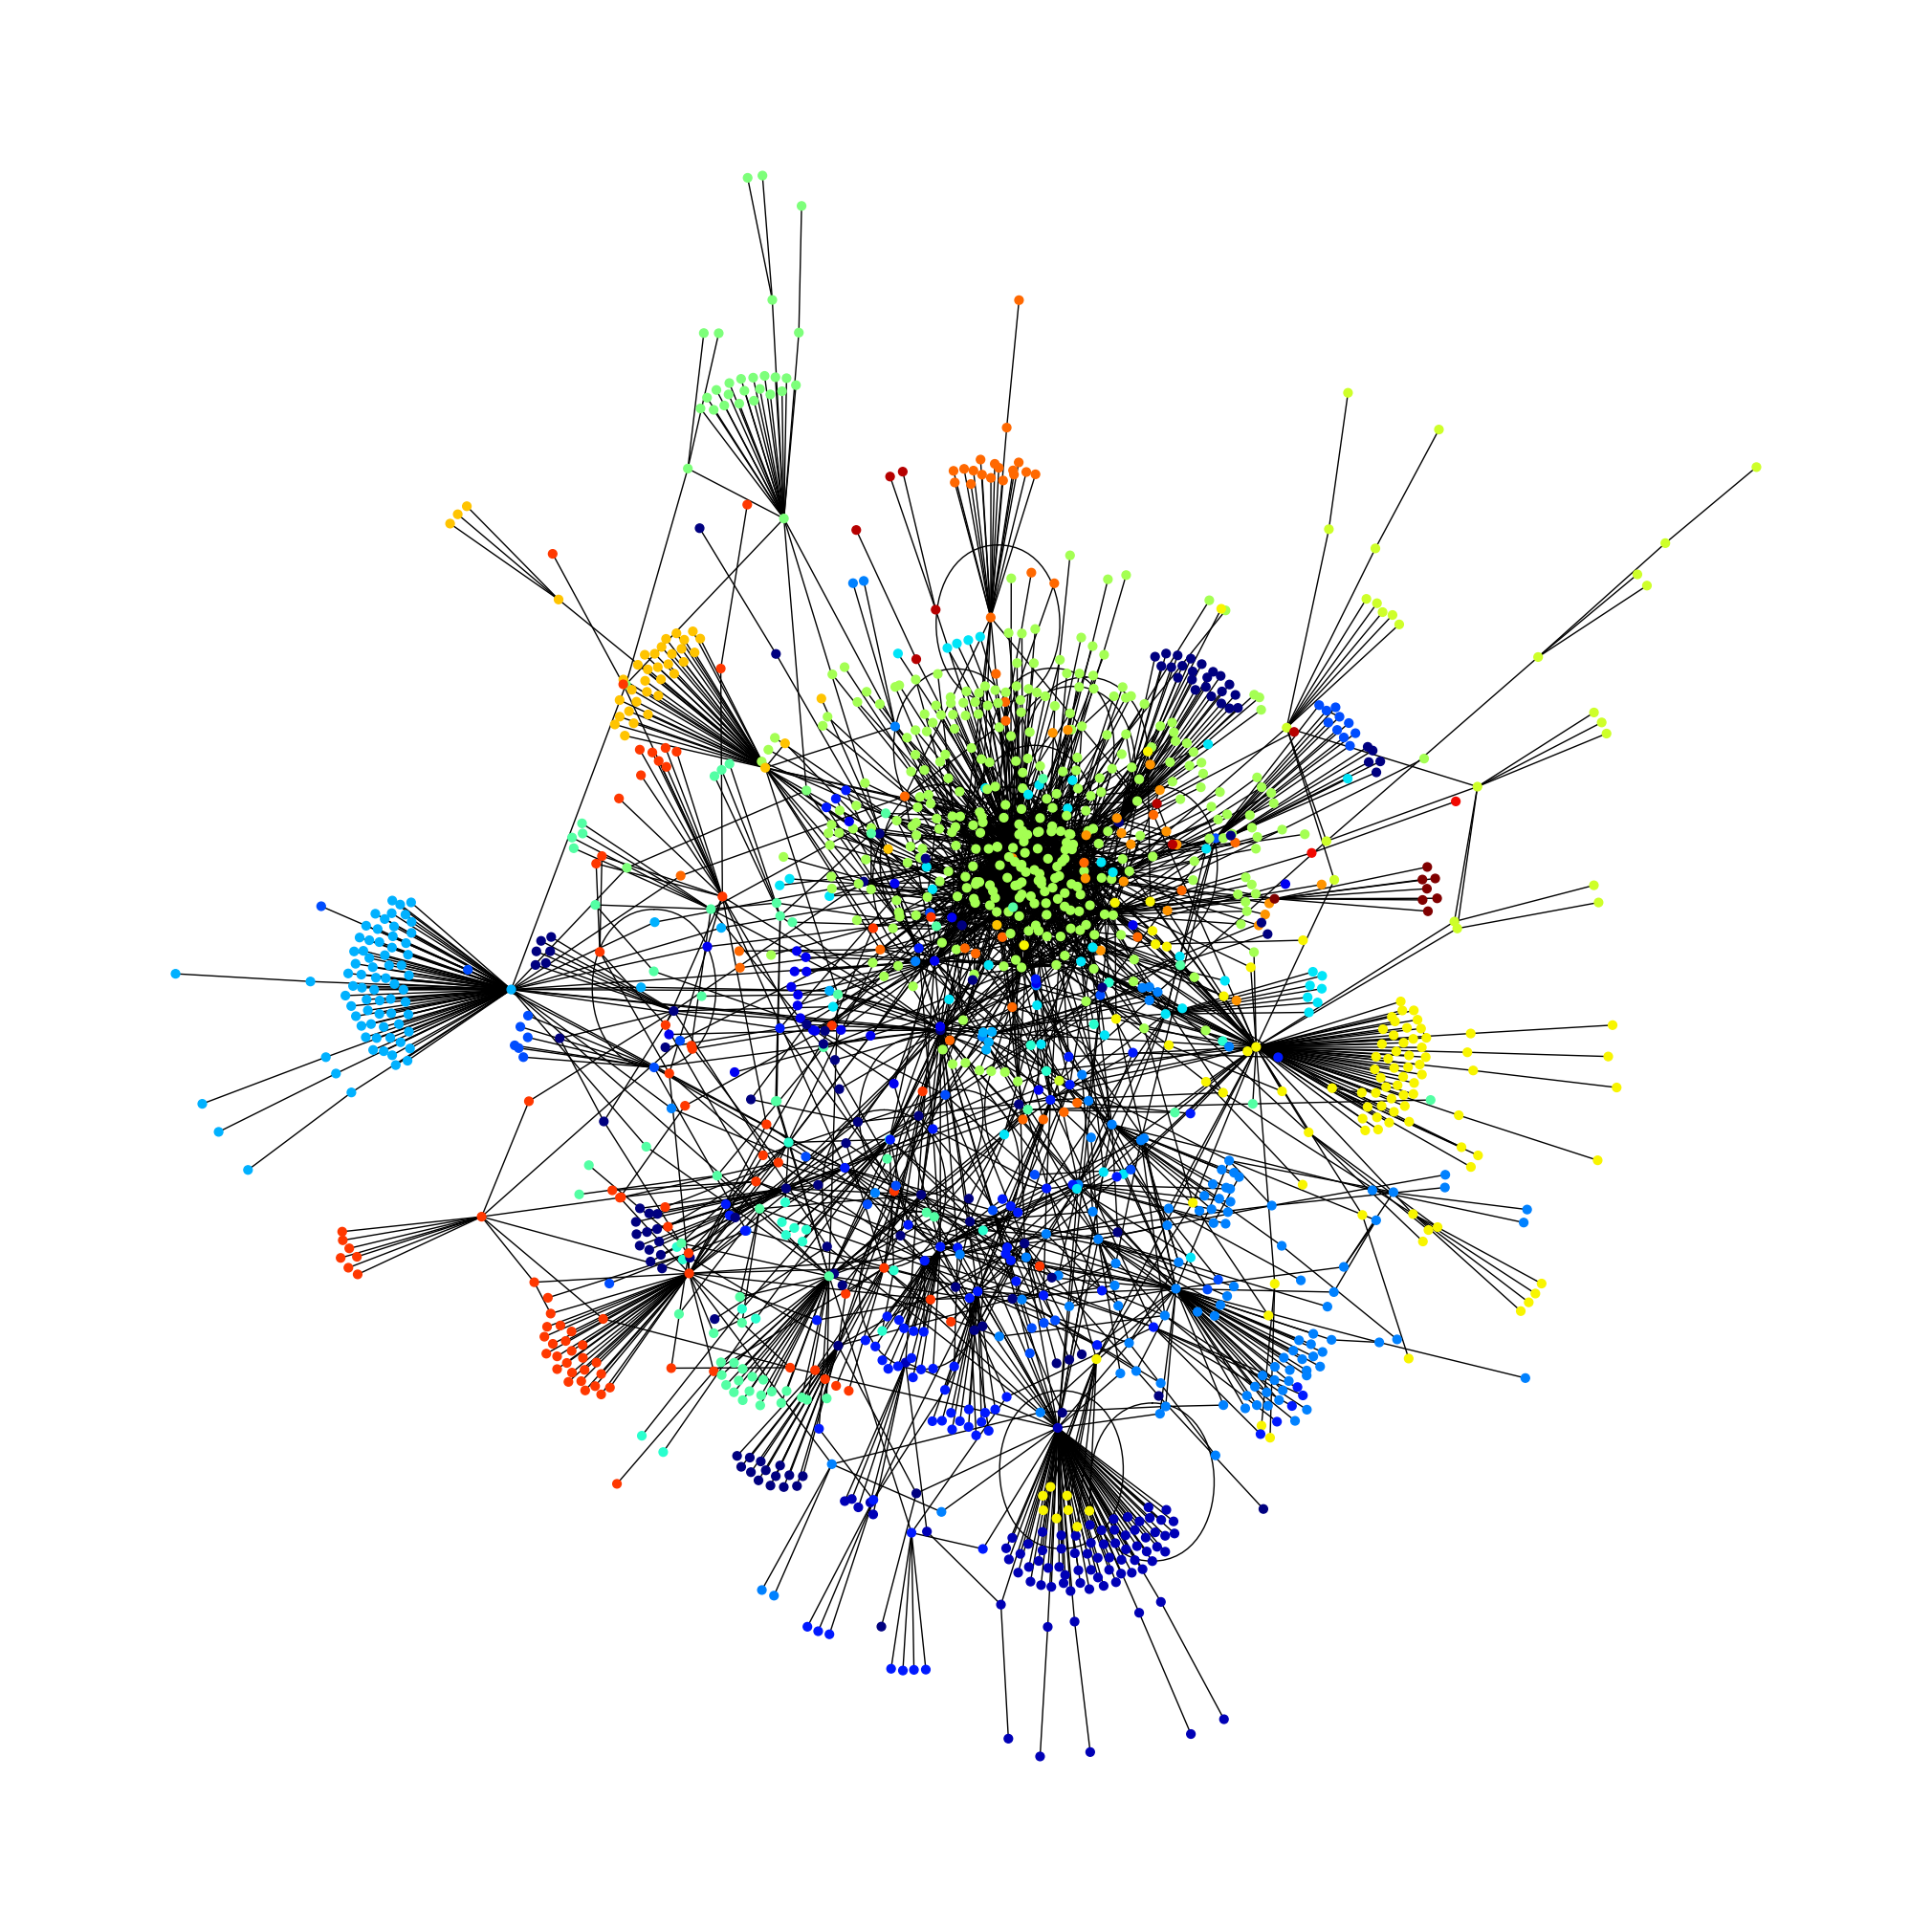

In [87]:
import community
import matplotlib.pyplot as plt
from community import community_louvain
part= community_louvain.best_partition(G)
mod= community_louvain.modularity(part,G)
values= [part.get(node) for node in G.nodes()]
plt.figure(figsize=(20, 20))
nx.draw_spring(G, cmap=plt.get_cmap('jet'), node_color = values, node_size=40, with_labels=False)
plt.show()

In [107]:
mod

0.5997634323697045

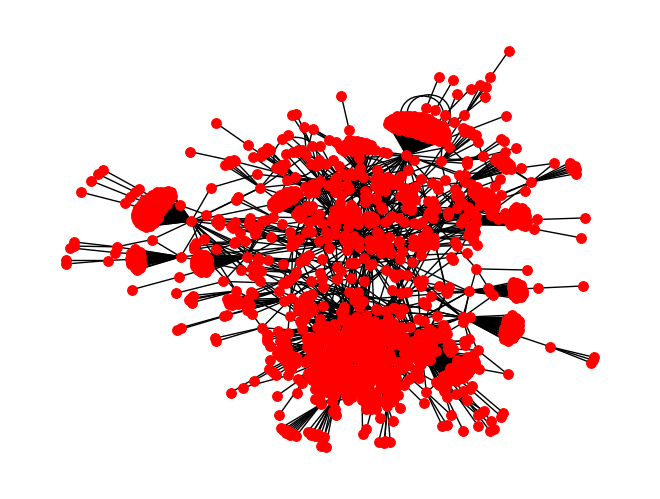

In [108]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='red',
        edge_color='black', linewidths=0.7)

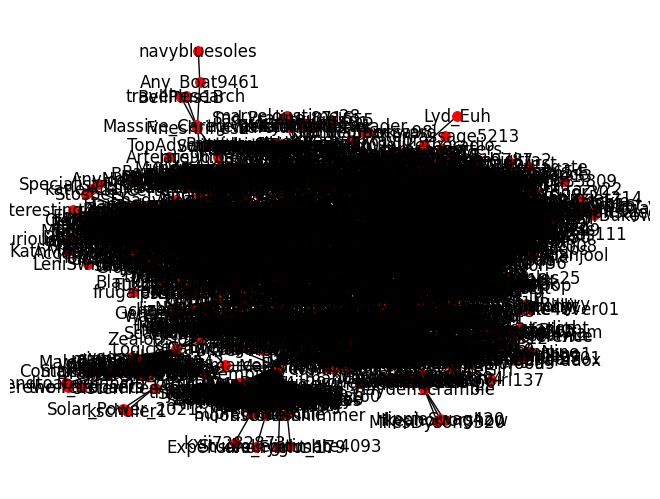

In [90]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color='red',
        edge_color='black', linewidths=0.7)

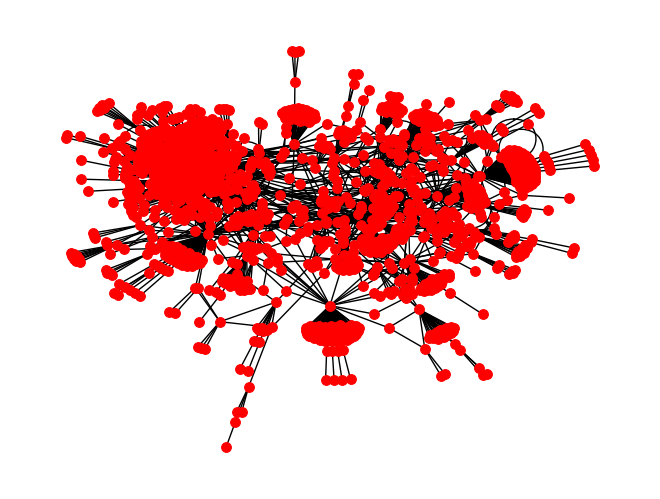

In [111]:
pos = nx.spring_layout(G, iterations=500)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='red',
        edge_color='black', linewidths=0.7)

In [112]:
r = nx.degree_assortativity_coefficient(G)
print(f"{r:3.1f}")


-0.2


In [114]:
c= nx.community.greedy_modularity_communities(G)
community_sizes = [len(community) for community in c]
for i, size in enumerate(community_sizes, 1):
    print(f"Community {i}: Size {size}")

Community 1: Size 368
Community 2: Size 238
Community 3: Size 137
Community 4: Size 98
Community 5: Size 83
Community 6: Size 80
Community 7: Size 62
Community 8: Size 55
Community 9: Size 51
Community 10: Size 35
Community 11: Size 34
Community 12: Size 29
Community 13: Size 26
Community 14: Size 24
Community 15: Size 9
Community 16: Size 8
Community 17: Size 6
Community 18: Size 3
Community 19: Size 3
Community 20: Size 3
Community 21: Size 3
Community 22: Size 2
Community 23: Size 2
Community 24: Size 2
Community 25: Size 2
Community 26: Size 1


In [94]:
df

node  community
0     -Page-of-Pentacles-          6
1      -Silver-Moonlight-          6
2      -mancomb-seepgood-          4
3       10thDoctorWhooves          2
4                  1985TV          6
...                   ...        ...
1391       youngmagicians          5
1392               yunith          3
1393          yynfdgdfasd          4
1394           zjanderson          0
1395           zoedietz21          2

[1396 rows x 2 columns]

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['community'].plot(kind='hist', bins=20, title='community')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='community', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['community']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('community')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['community'].plot(kind='line', figsize=(8, 4), title='community')
plt.gca().spines[['top', 'right']].set_visible(False)

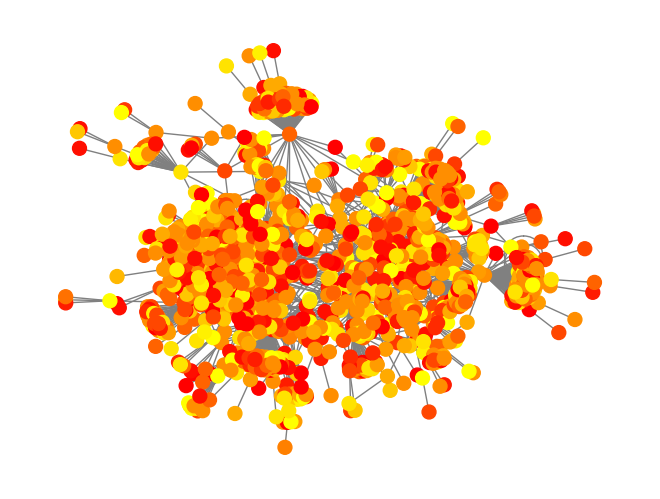

In [129]:
nx.draw(G, pos, with_labels=False, node_size=100, node_color=df['community'],
cmap=plt.cm.autumn, edge_color='gray')
plt.show()


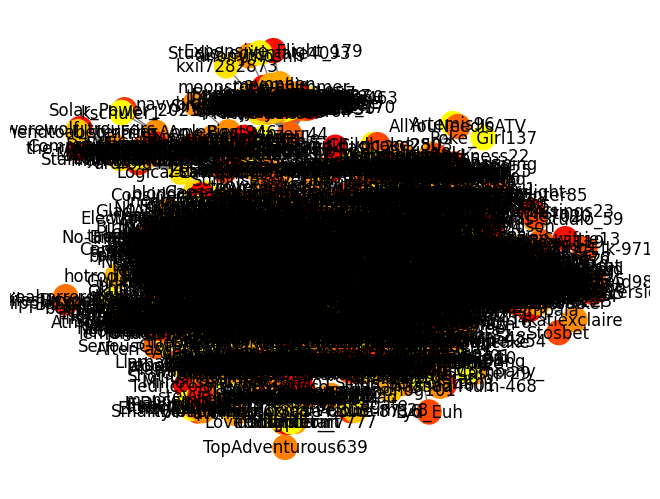

In [128]:
nx.draw(G, pos, with_labels=True, node_size=300, node_color=df['community'],
cmap=plt.cm.autumn, edge_color='gray')
plt.show()

In [130]:
def find_crossing_edges(G, df):
    crossing_edges = []
    for edge in G.edges():
        node1, node2 = edge
        community_node1 = int(df[df['node'] == node1 ]['community'])
        community_node2 = int(df[df['node'] == node2 ]['community'])
        if community_node1 != community_node2:
            crossing_edges.append(edge)
    return crossing_edges
crossing_edges = find_crossing_edges(G, df)
print("Crossing Edges:", crossing_edges)


Crossing Edges: [('AutoModerator', 'moltar24'), ('AutoModerator', 'klcna'), ('AutoModerator', 'MadameFutureWhatEver'), ('AutoModerator', 'pearlcatcher'), ('AutoModerator', 'itookyourmatches'), ('AutoModerator', 'ThrowRAStupidFriend'), ('AutoModerator', 'SurpriseSeveral4272'), ('AutoModerator', 'eatababy4'), ('AutoModerator', 'Logical-Law136'), ('AutoModerator', 'One-Structure705'), ('AutoModerator', 'Quick-Time'), ('AutoModerator', 'nfl'), ('AutoModerator', 'sarexsays'), ('AutoModerator', 'HetTheTable'), ('AutoModerator', 'icoulddance'), ('AutoModerator', 'LBLBLBLB92'), ('AutoModerator', 'NuclearPeridot'), ('AutoModerator', 'No-Needleworker-1278'), ('AutoModerator', 'OrgoQueen'), ('AutoModerator', 'Cheddarr_Cheesee'), ('AutoModerator', 'DragonfruitHot1440'), ('AutoModerator', '10thDoctorWhooves'), ('AutoModerator', 'sylvar'), ('AutoModerator', 'Mazerr44'), ('AutoModerator', 'bubblecuffer13'), ('AutoModerator', 'Glum_Banana7448'), ('AutoModerator', 'arihallak0816'), ('AutoModerator', 'A

In [116]:
from matplotlib.colors import Normalize

In [117]:
print(len(df['community']))
print(len(G.nodes))


1396
1364


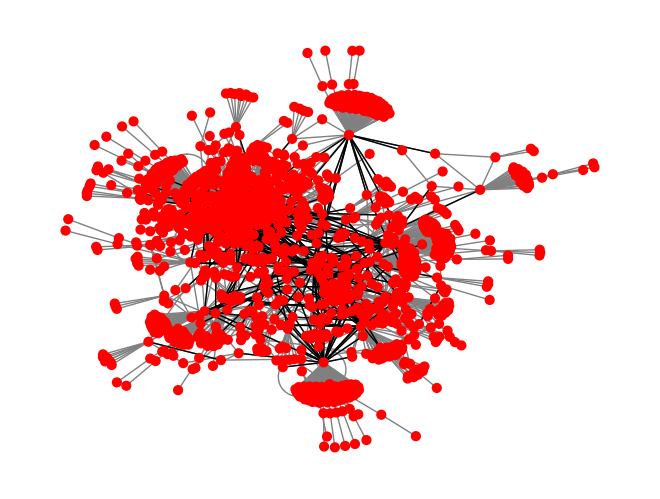

In [131]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'community' column contains numerical values
community_values = df['community']

# Convert numerical values to colors, considering only nodes that exist in the graph
node_colors = [community_values[node] if node in community_values.index else 0 for node in G.nodes]

# Generate layout
pos = nx.spring_layout(G)

# Plot nodes and labels
nx.draw(G, pos, with_labels=False, node_size=40, node_color=node_colors, cmap=plt.cm.autumn, edge_color='gray')

# Plot edges
nx.draw_networkx_edges(G, pos, edgelist=crossing_edges, edge_color='black', width=1.0)

# Show the plot
plt.show()


In [132]:
valid_crossing_edges = [(source, target) for source, target in crossing_edges if source in pos and target in pos]


In [133]:
print('AutoModerator' in G.nodes)


True


In [121]:
c= nx.community.louvain_communities(G)
community_sizes = [len(community) for community in c]
for i, size in enumerate(community_sizes, 1):
    print(f"Community {i}: Size {size}")

Community 1: Size 92
Community 2: Size 116
Community 3: Size 42
Community 4: Size 36
Community 5: Size 34
Community 6: Size 105
Community 7: Size 3
Community 8: Size 89
Community 9: Size 26
Community 10: Size 8
Community 11: Size 332
Community 12: Size 40
Community 13: Size 93
Community 14: Size 2
Community 15: Size 52
Community 16: Size 18
Community 17: Size 125
Community 18: Size 40
Community 19: Size 111


In [122]:
l=[]
i=0
for community in c:
    for node in community:
        l.append([node,i])
    i+=1
df= pd.DataFrame(l,columns=['node','community'])
df.sort_values(by='node',inplace=True)
df.reset_index(drop=True,inplace=True)


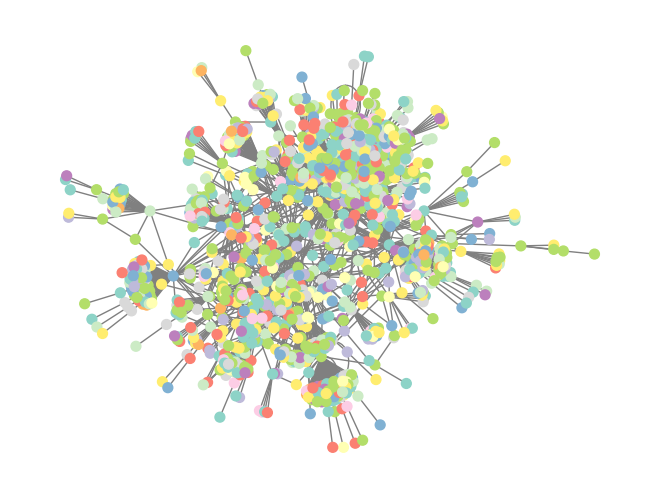

In [123]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color=df['community'],
 cmap=plt.cm.Set3, edge_color='gray')
plt.show()

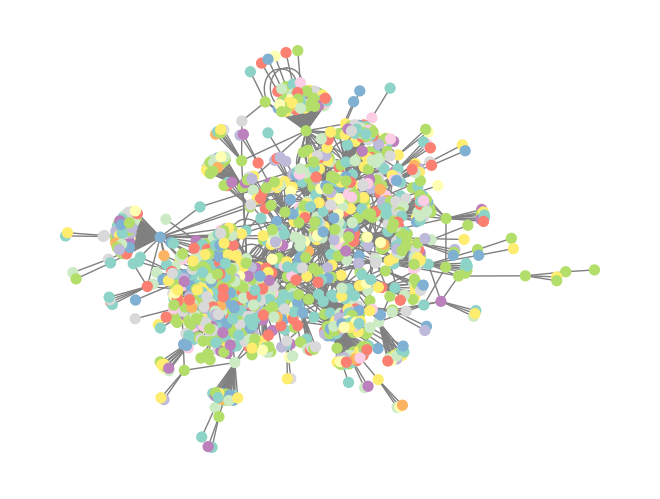

In [124]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color=df['community'],
 cmap=plt.cm.Set3, edge_color='gray')
plt.show()

In [125]:
nx.community.modularity(G, c)

0.6027208611972491

     k  modularity
0    2    0.157043
1    3    0.173814
2    4    0.465169
3    5    0.477584
4    6    0.486975
5    7    0.507763
6    8    0.514484
7    9    0.517677
8   10    0.525612
9   11    0.565954
10  12    0.567670
11  13    0.568791
12  14    0.568907
13  15    0.571311
14  16    0.573371
15  17    0.579743
16  18    0.579867
17  19    0.580513
18  20    0.580282
19  21    0.582378
20  22    0.583827
21  23    0.584055
22  24    0.584281
23  25    0.584757
24  26    0.585204
25  27    0.585891
26  28    0.584146
27  29    0.583791
28  30    0.584056


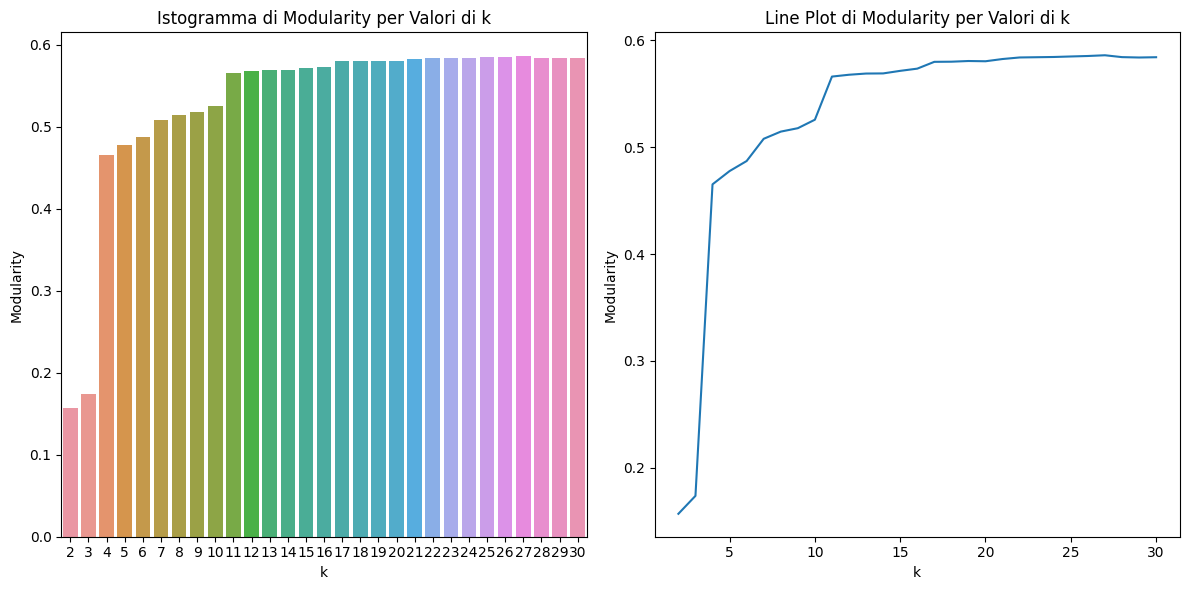

In [134]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


c = list(nx.community.girvan_newman(G))

selected_k_values = list(range(2, 31))

modularity_values = [[k, nx.community.modularity(G, c[k - 1])] for k in selected_k_values]

modularity_df = pd.DataFrame(modularity_values, columns=["k", "modularity"])

print(modularity_df)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="k", y="modularity", data=modularity_df)
plt.title('Istogramma di Modularity per Valori di k')
plt.xlabel('k')
plt.ylabel('Modularity')

plt.subplot(1, 2, 2)
sns.lineplot(x="k", y="modularity", data=modularity_df)
plt.title('Line Plot di Modularity per Valori di k')
plt.xlabel('k')
plt.ylabel('Modularity')

plt.tight_layout()
plt.show()


In [ ]:
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [ ]:
def visualize_communities(graph, communities):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.title(title)
    nx.draw(graph, pos=pos, node_size=300, node_color=node_colors,
            with_labels=True, font_color="black", edge_color='gray')
    plt.show()


In [ ]:
visualize_communities(G, c[0])


In [ ]:
c = list(nx.community.asyn_fluidc(G, 2))
community_sizes = [len(community) for community in c]

for i, size in enumerate(community_sizes, 1):
    print(f"Community {i}: Size {size}")


In [ ]:
l=[]
i=0
for community in c:
    for node in community:
        l.append([node,i])
    i+=1
df= pd.DataFrame(l,columns=['node','community'])
df.sort_values(by='node',inplace=True)
df.reset_index(drop=True,inplace=True)


In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color=df['community'],
 cmap=plt.cm.Set3, edge_color='gray')
plt.show()

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color=df['community'],
 cmap=plt.cm.Set3, edge_color='gray')
plt.show()

In [ ]:
nx.community.modularity(G, c)


In [ ]:
c = list(nx.community.asyn_fluidc(G, 3))
l=[]
i=0
for community in c:
    for node in community:
        l.append([node,i])
    i+=1
df= pd.DataFrame(l,columns=['node','community'])
df.sort_values(by='node',inplace=True)
df.reset_index(drop=True,inplace=True)


In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color=df['community'],
 cmap=plt.cm.Set3, edge_color='gray')
plt.show()

In [ ]:
nx.community.modularity(G, c)


In [ ]:
c = list(nx.community.asyn_fluidc(G, 8))
l=[]
i=0
for community in c:
    for node in community:
        l.append([node,i])
    i+=1
df= pd.DataFrame(l,columns=['node','community'])
df.sort_values(by='node',inplace=True)
df.reset_index(drop=True,inplace=True)


In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color=df['community'],
 cmap=plt.cm.Set3, edge_color='gray')
plt.show()

In [ ]:
nx.community.modularity(G, c)
